# Laptops market 💻
# Precio Ordenadores Portátiles 💻
## Veamos cómo de buenos somos prediciendo el valor de los productos.

### Overview
Nuestro jefe estaba buscando un@s maquinas para obtener datos de la competencia y poder aplicarle los conocimientos obtenidos para asignar precios a nuestra tienda de "MERIMARKT".
Lamentablemente se habían ido de vacaciones y nos lo ha pedido a nosotr@s …
💥🪓🔪

Nos toca arremangarnos las mangas y aplicar los conocimientos obtenidos en ML para obtener un modelo de predicción de precios de portátiles en función de sus marcas y prestaciones para poder lanzarlos a un precio competitivo al mercado.

### Evaluation
En esta tarea, utilizaremos el error absoluto medio (MAE) para evaluar la eficacia del modelo.

---
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error


#### DATASET

In [2]:
data = pd.read_csv('./data/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [4]:
data.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.000000
mean,645.091009,666.192982,15.011404,1108.122873
std,380.313813,384.873846,1.411744,714.597741
min,0.000000,1.000000,10.100000,174.000000
25%,319.750000,330.500000,14.000000,589.000000
50%,636.500000,673.500000,15.600000,949.000000
75%,980.250000,998.500000,15.600000,1458.500000
max,1302.000000,1320.000000,18.400000,6099.000000


In [5]:
data.describe(include='all')

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,912.000000,912.000000,912,912,912,912.000000,912,912,912,912,912,912,912,912.000000
unique,NaN,NaN,19,475,6,NaN,35,104,8,36,91,9,158,NaN
top,NaN,NaN,Lenovo,Inspiron 3567,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,NaN,208,21,522,NaN,346,142,434,293,199,746,86,NaN
mean,645.091009,666.192982,NaN,NaN,NaN,15.011404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108.122873
std,380.313813,384.873846,NaN,NaN,NaN,1.411744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,714.597741
min,0.000000,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,319.750000,330.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589.000000
50%,636.500000,673.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.000000
75%,980.250000,998.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1458.500000


In [6]:
data.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


#### DATA CLEANING

In [7]:
data = data.rename(columns=str.lower)

In [8]:

data = data.rename(columns={'price_euros' : 'price'})

In [9]:
data = data.drop('id', axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_id         912 non-null    int64  
 1   company           912 non-null    object 
 2   product           912 non-null    object 
 3   typename          912 non-null    object 
 4   inches            912 non-null    float64
 5   screenresolution  912 non-null    object 
 6   cpu               912 non-null    object 
 7   ram               912 non-null    object 
 8   memory            912 non-null    object 
 9   gpu               912 non-null    object 
 10  opsys             912 non-null    object 
 11  weight            912 non-null    object 
 12  price             912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [11]:
# pd.get_dummies(data['company'], dtype=int)

In [12]:
data_object = 'company'
data = pd.concat([data, pd.get_dummies(data[data_object], prefix=data_object, dtype=int)], axis=1)
data.drop(columns=[data_object], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   laptop_id          912 non-null    int64  
 1   product            912 non-null    object 
 2   typename           912 non-null    object 
 3   inches             912 non-null    float64
 4   screenresolution   912 non-null    object 
 5   cpu                912 non-null    object 
 6   ram                912 non-null    object 
 7   memory             912 non-null    object 
 8   gpu                912 non-null    object 
 9   opsys              912 non-null    object 
 10  weight             912 non-null    object 
 11  price              912 non-null    float64
 12  company_Acer       912 non-null    int32  
 13  company_Apple      912 non-null    int32  
 14  company_Asus       912 non-null    int32  
 15  company_Chuwi      912 non-null    int32  
 16  company_Dell       912 non

In [13]:
data_object = 'product'
data.drop(columns=[data_object], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   laptop_id          912 non-null    int64  
 1   typename           912 non-null    object 
 2   inches             912 non-null    float64
 3   screenresolution   912 non-null    object 
 4   cpu                912 non-null    object 
 5   ram                912 non-null    object 
 6   memory             912 non-null    object 
 7   gpu                912 non-null    object 
 8   opsys              912 non-null    object 
 9   weight             912 non-null    object 
 10  price              912 non-null    float64
 11  company_Acer       912 non-null    int32  
 12  company_Apple      912 non-null    int32  
 13  company_Asus       912 non-null    int32  
 14  company_Chuwi      912 non-null    int32  
 15  company_Dell       912 non-null    int32  
 16  company_Fujitsu    912 non

In [14]:
data_object = 'typename'
data = pd.concat([data, pd.get_dummies(data[data_object], prefix=data_object, dtype=int)], axis=1)
data.drop(columns=[data_object], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   screenresolution             912 non-null    object 
 3   cpu                          912 non-null    object 
 4   ram                          912 non-null    object 
 5   memory                       912 non-null    object 
 6   gpu                          912 non-null    object 
 7   opsys                        912 non-null    object 
 8   weight                       912 non-null    object 
 9   price                        912 non-null    float64
 10  company_Acer                 912 non-null    int32  
 11  company_Apple                912 non-null    int32  
 12  company_Asus                 912 non-null    int32  
 13  company_Chuwi       

In [15]:
def process_screen_resolution(resolution):
    result = {
        'screen_4K': 0,  
        'screen_HD': 0,
        'screen_Touchscreen': 0,  
        'screen_Retina': 0,
        'screen_Ultra': 0,
        'screen_width': None,  
        'screen_height': None
    }

    if '4K' in resolution:
        result['screen_4K'] = 1  
    if 'Full HD' in resolution or 'HD' in resolution:
        result['screen_HD'] = 1
    if 'Retina' in resolution:
        result['screen_Retina'] = 1
    
    match = re.search(r'(\d{3,4})x(\d{3,4})', resolution)
    if match:
        width, height = match.groups()
        result['screen_width'] = int(width)
        result['screen_height'] = int(height)

    return result

data_screen = data['screenresolution'].apply(process_screen_resolution)

data_screen = pd.DataFrame(data_screen.tolist())

data = pd.concat([data, data_screen], axis=1)

data.drop(columns=['screenresolution'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   cpu                          912 non-null    object 
 3   ram                          912 non-null    object 
 4   memory                       912 non-null    object 
 5   gpu                          912 non-null    object 
 6   opsys                        912 non-null    object 
 7   weight                       912 non-null    object 
 8   price                        912 non-null    float64
 9   company_Acer                 912 non-null    int32  
 10  company_Apple                912 non-null    int32  
 11  company_Asus                 912 non-null    int32  
 12  company_Chuwi                912 non-null    int32  
 13  company_Dell        

In [16]:
def extract_cpu_info(cpu_string):
    cpu_intel = 0
    cpu_amd = 0
    cpu_ghz = None

    if 'Intel' in cpu_string:
        cpu_intel = 1
        match = re.search(r'(\d+\.?\d*)GHz', cpu_string)
        if match:
            cpu_ghz = float(match.group(1))
    
    if 'AMD' in cpu_string:
        cpu_amd = 1
        match = re.search(r'(\d+\.?\d*)GHz', cpu_string)
        if match:
            cpu_ghz = float(match.group(1))

    return pd.Series([cpu_intel, cpu_amd, cpu_ghz], index=['cpu_intel', 'cpu_amd', 'cpu_ghz'])

data[['cpu_intel', 'cpu_amd', 'cpu_ghz']] = data['cpu'].apply(extract_cpu_info)

data['cpu_intel'] = data['cpu_intel'].astype(int)
data['cpu_amd'] = data['cpu_amd'].astype(int)

data.drop(columns=['cpu'], inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   ram                          912 non-null    object 
 3   memory                       912 non-null    object 
 4   gpu                          912 non-null    object 
 5   opsys                        912 non-null    object 
 6   weight                       912 non-null    object 
 7   price                        912 non-null    float64
 8   company_Acer                 912 non-null    int32  
 9   company_Apple                912 non-null    int32  
 10  company_Asus                 912 non-null    int32  
 11  company_Chuwi                912 non-null    int32  
 12  company_Dell                 912 non-null    int32  
 13  company_Fujitsu     

In [17]:
data.describe()


,laptop_id,inches,price,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Fujitsu,company_Google,...,screen_4K,screen_HD,screen_Touchscreen,screen_Retina,screen_Ultra,screen_width,screen_height,cpu_intel,cpu_amd,cpu_ghz
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.0,912.000000,912.0,912.000000,912.000000,912.000000,912.000000,912.000000
mean,666.192982,15.011404,1108.122873,0.082237,0.018640,0.118421,0.002193,0.226974,0.003289,0.002193,...,0.037281,0.691886,0.0,0.015351,0.0,1890.050439,1067.899123,0.956140,0.043860,2.287895
std,384.873846,1.411744,714.597741,0.274876,0.135325,0.323283,0.046804,0.419105,0.057291,0.046804,...,0.189553,0.461967,0.0,0.123011,0.0,506.007321,290.338307,0.204895,0.204895,0.513277
min,1.000000,10.100000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,1366.000000,768.000000,0.000000,0.000000,0.900000
25%,330.500000,14.000000,589.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,1366.000000,768.000000,1.000000,0.000000,2.000000
50%,673.500000,15.600000,949.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.0,1920.000000,1080.000000,1.000000,0.000000,2.500000
75%,998.500000,15.600000,1458.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.0,1920.000000,1080.000000,1.000000,0.000000,2.700000
max,1320.000000,18.400000,6099.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,3840.000000,2160.000000,1.000000,1.000000,3.600000


In [18]:
def extract_ram(ram_string):
    match = re.search(r'(\d+)GB', ram_string)
    if match:
        return int(match.group(1))
    return None

data['ram_numeric'] = data['ram'].apply(extract_ram)

data.drop(columns=['ram'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   memory                       912 non-null    object 
 3   gpu                          912 non-null    object 
 4   opsys                        912 non-null    object 
 5   weight                       912 non-null    object 
 6   price                        912 non-null    float64
 7   company_Acer                 912 non-null    int32  
 8   company_Apple                912 non-null    int32  
 9   company_Asus                 912 non-null    int32  
 10  company_Chuwi                912 non-null    int32  
 11  company_Dell                 912 non-null    int32  
 12  company_Fujitsu              912 non-null    int32  
 13  company_Google      

In [19]:
def extract_memory_info(memory_string):
    memory_types = {
        'memory_HDD': 0,
        'memory_SSD': 0,
        'memory_Flash': 0
    }
    memory_sizes = {    
        'memory_HDD_GB': 0,
        'memory_SSD_GB': 0,
        'memory_Flash_GB': 0
    }
    
    matches = re.findall(r'(\d+)([A-Za-z ]+)', memory_string)
    
    for match in matches:
        size = int(match[0])
        unit = match[1].strip().upper()
        
        if 'TB' in unit:
            size *= 1000  
        
        if 'HDD' in unit:
            memory_types['memory_HDD'] = 1
            memory_sizes['memory_HDD_GB'] += size
        elif 'SSD' in unit:
            memory_types['memory_SSD'] = 1
            memory_sizes['memory_SSD_GB'] += size
        elif 'FLASH STORAGE' in unit:
            memory_types['memory_Flash'] = 1
            memory_sizes['memory_Flash_GB'] += size
    
    result = {**memory_types, **memory_sizes}
    return pd.Series(result)

data[['memory_HDD', 'memory_SSD', 'memory_Flash', 'memory_HDD_GB', 'memory_SSD_GB', 'memory_Flash_GB']] = data['memory'].apply(extract_memory_info)

data.drop(columns=['memory'], inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   gpu                          912 non-null    object 
 3   opsys                        912 non-null    object 
 4   weight                       912 non-null    object 
 5   price                        912 non-null    float64
 6   company_Acer                 912 non-null    int32  
 7   company_Apple                912 non-null    int32  
 8   company_Asus                 912 non-null    int32  
 9   company_Chuwi                912 non-null    int32  
 10  company_Dell                 912 non-null    int32  
 11  company_Fujitsu              912 non-null    int32  
 12  company_Google               912 non-null    int32  
 13  company_HP          

In [20]:
data.describe()

,laptop_id,inches,price,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Fujitsu,company_Google,...,cpu_intel,cpu_amd,cpu_ghz,ram_numeric,memory_HDD,memory_SSD,memory_Flash,memory_HDD_GB,memory_SSD_GB,memory_Flash_GB
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,666.192982,15.011404,1108.122873,0.082237,0.018640,0.118421,0.002193,0.226974,0.003289,0.002193,...,0.956140,0.043860,2.287895,8.188596,0.437500,0.643640,0.059211,400.254386,180.074561,5.228070
std,384.873846,1.411744,714.597741,0.274876,0.135325,0.323283,0.046804,0.419105,0.057291,0.046804,...,0.204895,0.204895,0.513277,4.899827,0.496351,0.479186,0.236148,503.985613,184.580513,34.250715
min,1.000000,10.100000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,14.000000,589.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,673.500000,15.600000,949.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.500000,8.000000,0.000000,1.000000,0.000000,0.000000,180.000000,0.000000
75%,998.500000,15.600000,1458.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.700000,8.000000,1.000000,1.000000,0.000000,1000.000000,256.000000,0.000000
max,1320.000000,18.400000,6099.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,3.600000,32.000000,1.000000,1.000000,1.000000,2000.000000,1024.000000,512.000000


In [21]:
data.head()

,laptop_id,inches,gpu,opsys,weight,price,company_Acer,company_Apple,company_Asus,company_Chuwi,...,cpu_intel,cpu_amd,cpu_ghz,ram_numeric,memory_HDD,memory_SSD,memory_Flash,memory_HDD_GB,memory_SSD_GB,memory_Flash_GB
0,1002,15.6,AMD Radeon R7 M445,Windows 10,2.36kg,749.00,0,0,0,0,...,1,0,2.7,8,1,0,0,1000,0,0
1,867,15.6,Intel HD Graphics 505,Windows 10,2kg,449.00,0,0,1,0,...,1,0,1.1,4,1,0,0,1000,0,0
2,966,13.3,Intel HD Graphics 520,Windows 7,1.2kg,1460.00,0,0,0,0,...,1,0,2.3,8,0,1,0,0,256,0
3,767,15.6,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99,0,0,0,0,...,1,0,2.8,16,1,1,0,1000,256,0
4,1241,12.5,Intel HD Graphics 520,Windows 7,1.26kg,1713.37,0,0,0,0,...,1,0,2.4,8,0,1,0,0,256,0


In [22]:
data_object = 'gpu'
# data = pd.concat([data, pd.get_dummies(data[data_object], prefix=data_object, dtype=int)], axis=1)
data.drop(columns=[data_object], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   opsys                        912 non-null    object 
 3   weight                       912 non-null    object 
 4   price                        912 non-null    float64
 5   company_Acer                 912 non-null    int32  
 6   company_Apple                912 non-null    int32  
 7   company_Asus                 912 non-null    int32  
 8   company_Chuwi                912 non-null    int32  
 9   company_Dell                 912 non-null    int32  
 10  company_Fujitsu              912 non-null    int32  
 11  company_Google               912 non-null    int32  
 12  company_HP                   912 non-null    int32  
 13  company_Huawei      

In [23]:
data_object = 'opsys'
data = pd.concat([data, pd.get_dummies(data[data_object], prefix=data_object, dtype=int)], axis=1)
data.drop(columns=[data_object], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   weight                       912 non-null    object 
 3   price                        912 non-null    float64
 4   company_Acer                 912 non-null    int32  
 5   company_Apple                912 non-null    int32  
 6   company_Asus                 912 non-null    int32  
 7   company_Chuwi                912 non-null    int32  
 8   company_Dell                 912 non-null    int32  
 9   company_Fujitsu              912 non-null    int32  
 10  company_Google               912 non-null    int32  
 11  company_HP                   912 non-null    int32  
 12  company_Huawei               912 non-null    int32  
 13  company_LG          

In [24]:
def extract_weight(weight_string):
    match = re.search(r'(\d+(\.\d+)?)', weight_string)
    if match:
        return float(match.group(1))
    return None

data['weight_kg'] = data['weight'].apply(extract_weight)

data.drop(columns=['weight'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   price                        912 non-null    float64
 3   company_Acer                 912 non-null    int32  
 4   company_Apple                912 non-null    int32  
 5   company_Asus                 912 non-null    int32  
 6   company_Chuwi                912 non-null    int32  
 7   company_Dell                 912 non-null    int32  
 8   company_Fujitsu              912 non-null    int32  
 9   company_Google               912 non-null    int32  
 10  company_HP                   912 non-null    int32  
 11  company_Huawei               912 non-null    int32  
 12  company_LG                   912 non-null    int32  
 13  company_Lenovo      

In [25]:
data.head()

,laptop_id,inches,price,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Fujitsu,company_Google,...,opsys_Android,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS,weight_kg
0,1002,15.6,749.00,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2.36
1,867,15.6,449.00,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.00
2,966,13.3,1460.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.20
3,767,15.6,2868.99,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,4.42
4,1241,12.5,1713.37,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1.26


In [26]:
columns = list(data.columns)

index_inches = columns.index('inches')
index_price = columns.index('price')

columns[index_inches], columns[index_price] = columns[index_price], columns[index_inches]

data = data[columns]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   price                        912 non-null    float64
 2   inches                       912 non-null    float64
 3   company_Acer                 912 non-null    int32  
 4   company_Apple                912 non-null    int32  
 5   company_Asus                 912 non-null    int32  
 6   company_Chuwi                912 non-null    int32  
 7   company_Dell                 912 non-null    int32  
 8   company_Fujitsu              912 non-null    int32  
 9   company_Google               912 non-null    int32  
 10  company_HP                   912 non-null    int32  
 11  company_Huawei               912 non-null    int32  
 12  company_LG                   912 non-null    int32  
 13  company_Lenovo      

#### TRAIN


In [28]:
features = ['company_Fujitsu', 'company_Mediacom', 'opsys_Android']
data = data.drop(features, axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   price                        912 non-null    float64
 2   inches                       912 non-null    float64
 3   company_Acer                 912 non-null    int32  
 4   company_Apple                912 non-null    int32  
 5   company_Asus                 912 non-null    int32  
 6   company_Chuwi                912 non-null    int32  
 7   company_Dell                 912 non-null    int32  
 8   company_Google               912 non-null    int32  
 9   company_HP                   912 non-null    int32  
 10  company_Huawei               912 non-null    int32  
 11  company_LG                   912 non-null    int32  
 12  company_Lenovo               912 non-null    int32  
 13  company_MSI         

In [30]:
X = data.drop('price', axis=1)
y = data['price']


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   inches                       912 non-null    float64
 2   company_Acer                 912 non-null    int32  
 3   company_Apple                912 non-null    int32  
 4   company_Asus                 912 non-null    int32  
 5   company_Chuwi                912 non-null    int32  
 6   company_Dell                 912 non-null    int32  
 7   company_Google               912 non-null    int32  
 8   company_HP                   912 non-null    int32  
 9   company_Huawei               912 non-null    int32  
 10  company_LG                   912 non-null    int32  
 11  company_Lenovo               912 non-null    int32  
 12  company_MSI                  912 non-null    int32  
 13  company_Microsoft   

In [32]:
X.describe()

,laptop_id,inches,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Google,company_HP,company_Huawei,...,memory_Flash_GB,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS,weight_kg
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,666.192982,15.011404,0.082237,0.018640,0.118421,0.002193,0.226974,0.002193,0.207237,0.001096,...,5.228070,0.021930,0.051535,0.006579,0.048246,0.817982,0.004386,0.035088,0.012061,2.032112
std,384.873846,1.411744,0.274876,0.135325,0.323283,0.046804,0.419105,0.046804,0.405549,0.033113,...,34.250715,0.146535,0.221208,0.080888,0.214402,0.386071,0.066117,0.184103,0.109220,0.653772
min,1.000000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000
25%,330.500000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.500000
50%,673.500000,15.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.040000
75%,998.500000,15.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.300000
max,1320.000000,18.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.600000


In [33]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# X_df = pd.DataFrame(X, columns=data.columns[1:])
# X_df.describe()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


X_train: (729, 51)
X_test: (183, 51)
y_train: (729,)
y_test: (183,)


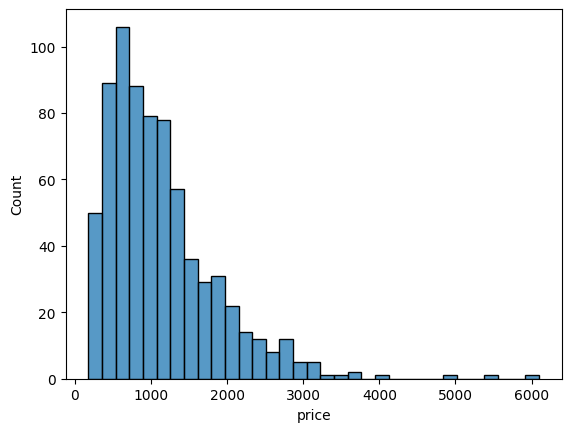

In [36]:
sns.histplot(y_train)
plt.show()


In [37]:
# y_train = np.log10(y_train)

# sns.histplot(y_train)
# plt.show()

#### LINEAR REGRESSION

In [38]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)



LinearRegression()

In [39]:
y_pred_lr = model_lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse}')

rmse = root_mean_squared_error(y_test, y_pred_lr)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred_lr)
print(f'R-squared: {r2}')


Mean Absolute Error: 225.0373618459143
Mean Squared Error: 109591.57126676434
Root Mean Squared Error: 331.04617694026365
R-squared: 0.7462606555927758


#### CATBOOST

In [40]:
# !pip uninstall numpy catboost
# !pip install numpy==1.21.0
# !pip install catboost==0.26

!pip install catboost


In [41]:
from catboost import CatBoostRegressor


In [42]:
model_cb = CatBoostRegressor(random_state= 42)

model_cb.fit(X_train, y_train, verbose= 0)


In [43]:
y_pred_cb = model_cb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_cb)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred_cb)
print(f'Mean Squared Error: {mse}')

rmse = root_mean_squared_error(y_test, y_pred_cb)
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred_cb)
print(f'R-squared: {r2}')


Mean Absolute Error: 175.69827159548046
Mean Squared Error: 70559.5245948574
Root Mean Squared Error: 265.6304285936711
R-squared: 0.836632258252746


#### GRADIENTE REGRESSOR

In [44]:
# gradient_model = GradientBoostingRegressor(random_state= 42)

# gradient_model.fit(x_train, y_train)

In [45]:
# y_pred_cb = model_cb.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred_cb)
# print(f'Mean Absolute Error: {mae}')

# mse = mean_squared_error(y_test, y_pred_cb)
# print(f'Mean Squared Error: {mse}')

# rmse = root_mean_squared_error(y_test, y_pred_cb)
# print(f'Root Mean Squared Error: {rmse}')

# r2 = r2_score(y_test, y_pred_cb)
# print(f'R-squared: {r2}')

#### 🎯 SELECT MODEL

In [46]:
model = model_lr

predicciones = model.predict(X_test)

print(predicciones)

[1645.84315368 1139.35859702  968.99717085 1029.09517452 1694.60769105
  353.33878068  342.81049019  342.88293737  455.77419161  817.52131999
  221.85340677 2495.90377788  704.99284374 1093.19277278  400.29098489
 1287.12175197  430.03035248 1342.08570695   64.91093744  872.27409237
  600.01455012  966.20605794 1613.97414649  583.80653458 1443.95258251
  651.57155427 1085.87356514  910.19978087 1413.44652375 1124.91697436
  812.77758246 2049.6444513   417.28008573  982.7200495   329.31292343
  502.76707709 -137.01392912 2076.45998552 1202.88289075 1958.1973321
  819.8907862   927.71651114 2126.68533969  234.38575435  519.14315909
  332.23916646 1409.78527451  599.01646952 1039.33881449 1121.49809585
 1858.6358843  1818.79035544  797.9082485  1301.63458106 1182.16203956
 1058.81012214  293.8074879   480.42757296  704.79576882 1200.84155741
 1275.5642396   545.84207833 1205.85954605 1130.9015157  1919.5330899
  862.70328434 1037.59267593  521.36689466 1013.4006239   664.89050168
  323.54

#### PREDICT

In [47]:
data_test = pd.read_csv('./data/test.csv')

In [48]:
data_test = data_test.rename(columns=str.lower)

In [49]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_id         391 non-null    int64  
 2   company           391 non-null    object 
 3   product           391 non-null    object 
 4   typename          391 non-null    object 
 5   inches            391 non-null    float64
 6   screenresolution  391 non-null    object 
 7   cpu               391 non-null    object 
 8   ram               391 non-null    object 
 9   memory            391 non-null    object 
 10  gpu               391 non-null    object 
 11  opsys             391 non-null    object 
 12  weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [50]:
data_object = 'company'
data_test = pd.concat([data_test, pd.get_dummies(data_test[data_object], prefix=data_object, dtype=int)], axis=1)
data_test.drop(columns=[data_object], inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 391 non-null    int64  
 1   laptop_id          391 non-null    int64  
 2   product            391 non-null    object 
 3   typename           391 non-null    object 
 4   inches             391 non-null    float64
 5   screenresolution   391 non-null    object 
 6   cpu                391 non-null    object 
 7   ram                391 non-null    object 
 8   memory             391 non-null    object 
 9   gpu                391 non-null    object 
 10  opsys              391 non-null    object 
 11  weight             391 non-null    object 
 12  company_Acer       391 non-null    int32  
 13  company_Apple      391 non-null    int32  
 14  company_Asus       391 non-null    int32  
 15  company_Chuwi      391 non-null    int32  
 16  company_Dell       391 non

In [51]:
data_object = 'product'
data_test.drop(columns=[data_object], inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 391 non-null    int64  
 1   laptop_id          391 non-null    int64  
 2   typename           391 non-null    object 
 3   inches             391 non-null    float64
 4   screenresolution   391 non-null    object 
 5   cpu                391 non-null    object 
 6   ram                391 non-null    object 
 7   memory             391 non-null    object 
 8   gpu                391 non-null    object 
 9   opsys              391 non-null    object 
 10  weight             391 non-null    object 
 11  company_Acer       391 non-null    int32  
 12  company_Apple      391 non-null    int32  
 13  company_Asus       391 non-null    int32  
 14  company_Chuwi      391 non-null    int32  
 15  company_Dell       391 non-null    int32  
 16  company_Google     391 non

In [52]:
data_object = 'typename'
data_test = pd.concat([data_test, pd.get_dummies(data_test[data_object], prefix=data_object, dtype=int)], axis=1)
data_test.drop(columns=[data_object], inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_id                    391 non-null    int64  
 2   inches                       391 non-null    float64
 3   screenresolution             391 non-null    object 
 4   cpu                          391 non-null    object 
 5   ram                          391 non-null    object 
 6   memory                       391 non-null    object 
 7   gpu                          391 non-null    object 
 8   opsys                        391 non-null    object 
 9   weight                       391 non-null    object 
 10  company_Acer                 391 non-null    int32  
 11  company_Apple                391 non-null    int32  
 12  company_Asus                 391 non-null    int32  
 13  company_Chuwi       

In [53]:
def process_screen_resolution(resolution):
    result = {
        'screen_4K': 0,  
        'screen_HD': 0,
        'screen_Touchscreen': 0,  
        'screen_Retina': 0,
        'screen_Ultra': 0,
        'screen_width': None,  
        'screen_height': None
    }

    if '4K' in resolution:
        result['screen_4K'] = 1  
    if 'Full HD' in resolution or 'HD' in resolution:
        result['screen_HD'] = 1
    if 'Retina' in resolution:
        result['screen_Retina'] = 1
    
    match = re.search(r'(\d{3,4})x(\d{3,4})', resolution)
    if match:
        width, height = match.groups()
        result['screen_width'] = int(width)
        result['screen_height'] = int(height)

    return result

data_screen = data_test['screenresolution'].apply(process_screen_resolution)

data_screen = pd.DataFrame(data_screen.tolist())

data_test = pd.concat([data_test, data_screen], axis=1)

data_test.drop(columns=['screenresolution'], inplace=True)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_id                    391 non-null    int64  
 2   inches                       391 non-null    float64
 3   cpu                          391 non-null    object 
 4   ram                          391 non-null    object 
 5   memory                       391 non-null    object 
 6   gpu                          391 non-null    object 
 7   opsys                        391 non-null    object 
 8   weight                       391 non-null    object 
 9   company_Acer                 391 non-null    int32  
 10  company_Apple                391 non-null    int32  
 11  company_Asus                 391 non-null    int32  
 12  company_Chuwi                391 non-null    int32  
 13  company_Dell        

In [54]:
def extract_cpu_info(cpu_string):
    cpu_intel = 0
    cpu_amd = 0
    cpu_ghz = None

    if 'Intel' in cpu_string:
        cpu_intel = 1
        match = re.search(r'(\d+\.?\d*)GHz', cpu_string)
        if match:
            cpu_ghz = float(match.group(1))
    
    if 'AMD' in cpu_string:
        cpu_amd = 1
        match = re.search(r'(\d+\.?\d*)GHz', cpu_string)
        if match:
            cpu_ghz = float(match.group(1))

    return pd.Series([cpu_intel, cpu_amd, cpu_ghz], index=['cpu_intel', 'cpu_amd', 'cpu_ghz'])

data_test[['cpu_intel', 'cpu_amd', 'cpu_ghz']] = data_test['cpu'].apply(extract_cpu_info)

data_test['cpu_intel'] = data_test['cpu_intel'].astype(int)
data_test['cpu_amd'] = data_test['cpu_amd'].astype(int)

data_test.drop(columns=['cpu'], inplace=True)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_id                    391 non-null    int64  
 2   inches                       391 non-null    float64
 3   ram                          391 non-null    object 
 4   memory                       391 non-null    object 
 5   gpu                          391 non-null    object 
 6   opsys                        391 non-null    object 
 7   weight                       391 non-null    object 
 8   company_Acer                 391 non-null    int32  
 9   company_Apple                391 non-null    int32  
 10  company_Asus                 391 non-null    int32  
 11  company_Chuwi                391 non-null    int32  
 12  company_Dell                 391 non-null    int32  
 13  company_Google      

In [55]:
def extract_ram(ram_string):
    match = re.search(r'(\d+)GB', ram_string)
    if match:
        return int(match.group(1))
    return None

data_test['ram_numeric'] = data_test['ram'].apply(extract_ram)

data_test.drop(columns=['ram'], inplace=True)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_id                    391 non-null    int64  
 2   inches                       391 non-null    float64
 3   memory                       391 non-null    object 
 4   gpu                          391 non-null    object 
 5   opsys                        391 non-null    object 
 6   weight                       391 non-null    object 
 7   company_Acer                 391 non-null    int32  
 8   company_Apple                391 non-null    int32  
 9   company_Asus                 391 non-null    int32  
 10  company_Chuwi                391 non-null    int32  
 11  company_Dell                 391 non-null    int32  
 12  company_Google               391 non-null    int32  
 13  company_HP          

In [56]:
def extract_memory_info(memory_string):
    memory_types = {
        'memory_HDD': 0,
        'memory_SSD': 0,
        'memory_Flash': 0
    }
    memory_sizes = {    
        'memory_HDD_GB': 0,
        'memory_SSD_GB': 0,
        'memory_Flash_GB': 0
    }
    
    matches = re.findall(r'(\d+)([A-Za-z ]+)', memory_string)
    
    for match in matches:
        size = int(match[0])
        unit = match[1].strip().upper()
        
        if 'TB' in unit:
            size *= 1000  
        
        if 'HDD' in unit:
            memory_types['memory_HDD'] = 1
            memory_sizes['memory_HDD_GB'] += size
        elif 'SSD' in unit:
            memory_types['memory_SSD'] = 1
            memory_sizes['memory_SSD_GB'] += size
        elif 'FLASH STORAGE' in unit:
            memory_types['memory_Flash'] = 1
            memory_sizes['memory_Flash_GB'] += size
    
    result = {**memory_types, **memory_sizes}
    return pd.Series(result)

data_test[['memory_HDD', 'memory_SSD', 'memory_Flash', 'memory_HDD_GB', 'memory_SSD_GB', 'memory_Flash_GB']] = data_test['memory'].apply(extract_memory_info)

data_test.drop(columns=['memory'], inplace=True)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_id                    391 non-null    int64  
 2   inches                       391 non-null    float64
 3   gpu                          391 non-null    object 
 4   opsys                        391 non-null    object 
 5   weight                       391 non-null    object 
 6   company_Acer                 391 non-null    int32  
 7   company_Apple                391 non-null    int32  
 8   company_Asus                 391 non-null    int32  
 9   company_Chuwi                391 non-null    int32  
 10  company_Dell                 391 non-null    int32  
 11  company_Google               391 non-null    int32  
 12  company_HP                   391 non-null    int32  
 13  company_Huawei      

In [57]:
data_object = 'gpu'
# data = pd.concat([data, pd.get_dummies(data[data_object], prefix=data_object, dtype=int)], axis=1)
data_test.drop(columns=[data_object], inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_id                    391 non-null    int64  
 2   inches                       391 non-null    float64
 3   opsys                        391 non-null    object 
 4   weight                       391 non-null    object 
 5   company_Acer                 391 non-null    int32  
 6   company_Apple                391 non-null    int32  
 7   company_Asus                 391 non-null    int32  
 8   company_Chuwi                391 non-null    int32  
 9   company_Dell                 391 non-null    int32  
 10  company_Google               391 non-null    int32  
 11  company_HP                   391 non-null    int32  
 12  company_Huawei               391 non-null    int32  
 13  company_LG          

In [58]:
data_object = 'opsys'
data_test = pd.concat([data_test, pd.get_dummies(data_test[data_object], prefix=data_object, dtype=int)], axis=1)
data_test.drop(columns=[data_object], inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_id                    391 non-null    int64  
 2   inches                       391 non-null    float64
 3   weight                       391 non-null    object 
 4   company_Acer                 391 non-null    int32  
 5   company_Apple                391 non-null    int32  
 6   company_Asus                 391 non-null    int32  
 7   company_Chuwi                391 non-null    int32  
 8   company_Dell                 391 non-null    int32  
 9   company_Google               391 non-null    int32  
 10  company_HP                   391 non-null    int32  
 11  company_Huawei               391 non-null    int32  
 12  company_LG                   391 non-null    int32  
 13  company_Lenovo      

In [59]:
def extract_weight(weight_string):
    match = re.search(r'(\d+(\.\d+)?)', weight_string)
    if match:
        return float(match.group(1))
    return None

data_test['weight_kg'] = data_test['weight'].apply(extract_weight)

data_test.drop(columns=['weight'], inplace=True)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           391 non-null    int64  
 1   laptop_id                    391 non-null    int64  
 2   inches                       391 non-null    float64
 3   company_Acer                 391 non-null    int32  
 4   company_Apple                391 non-null    int32  
 5   company_Asus                 391 non-null    int32  
 6   company_Chuwi                391 non-null    int32  
 7   company_Dell                 391 non-null    int32  
 8   company_Google               391 non-null    int32  
 9   company_HP                   391 non-null    int32  
 10  company_Huawei               391 non-null    int32  
 11  company_LG                   391 non-null    int32  
 12  company_Lenovo               391 non-null    int32  
 13  company_MSI         

In [60]:
data_test.isna().sum()

id                             0
laptop_id                      0
inches                         0
company_Acer                   0
company_Apple                  0
company_Asus                   0
company_Chuwi                  0
company_Dell                   0
company_Google                 0
company_HP                     0
company_Huawei                 0
company_LG                     0
company_Lenovo                 0
company_MSI                    0
company_Microsoft              0
company_Razer                  0
company_Samsung                0
company_Toshiba                0
company_Vero                   0
company_Xiaomi                 0
typename_2 in 1 Convertible    0
typename_Gaming                0
typename_Netbook               0
typename_Notebook              0
typename_Ultrabook             0
typename_Workstation           0
screen_4K                      0
screen_HD                      0
screen_Touchscreen             0
screen_Retina                  0
screen_Ult

In [61]:
median_values = data_test.median()

data_test = data_test.fillna(median_values)

In [62]:
data_test.isna().sum()

id                             0
laptop_id                      0
inches                         0
company_Acer                   0
company_Apple                  0
company_Asus                   0
company_Chuwi                  0
company_Dell                   0
company_Google                 0
company_HP                     0
company_Huawei                 0
company_LG                     0
company_Lenovo                 0
company_MSI                    0
company_Microsoft              0
company_Razer                  0
company_Samsung                0
company_Toshiba                0
company_Vero                   0
company_Xiaomi                 0
typename_2 in 1 Convertible    0
typename_Gaming                0
typename_Netbook               0
typename_Notebook              0
typename_Ultrabook             0
typename_Workstation           0
screen_4K                      0
screen_HD                      0
screen_Touchscreen             0
screen_Retina                  0
screen_Ult

In [63]:
data_test_copy = data_test.drop('id', axis=1)
# features = ['company_Fujitsu', 'company_Mediacom', 'opsys_Android']
# for feature in features:
#     if feature not in data_test.columns:
#         data_test[feature] = 0

In [64]:
data_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    391 non-null    int64  
 1   inches                       391 non-null    float64
 2   company_Acer                 391 non-null    int32  
 3   company_Apple                391 non-null    int32  
 4   company_Asus                 391 non-null    int32  
 5   company_Chuwi                391 non-null    int32  
 6   company_Dell                 391 non-null    int32  
 7   company_Google               391 non-null    int32  
 8   company_HP                   391 non-null    int32  
 9   company_Huawei               391 non-null    int32  
 10  company_LG                   391 non-null    int32  
 11  company_Lenovo               391 non-null    int32  
 12  company_MSI                  391 non-null    int32  
 13  company_Microsoft   

In [65]:
X_test = data_test_copy

X_test = X_test.dropna()

X_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    391 non-null    int64  
 1   inches                       391 non-null    float64
 2   company_Acer                 391 non-null    int32  
 3   company_Apple                391 non-null    int32  
 4   company_Asus                 391 non-null    int32  
 5   company_Chuwi                391 non-null    int32  
 6   company_Dell                 391 non-null    int32  
 7   company_Google               391 non-null    int32  
 8   company_HP                   391 non-null    int32  
 9   company_Huawei               391 non-null    int32  
 10  company_LG                   391 non-null    int32  
 11  company_Lenovo               391 non-null    int32  
 12  company_MSI                  391 non-null    int32  
 13  company_Microsoft   

In [66]:
X_test.describe()



,laptop_id,inches,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Google,company_HP,company_Huawei,...,memory_Flash_GB,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS,weight_kg
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,646.074169,15.030691,0.071611,0.010230,0.127877,0.002558,0.230179,0.002558,0.217391,0.002558,...,2.987212,0.017903,0.038363,0.005115,0.056266,0.833760,0.010230,0.033248,0.005115,2.054179
std,372.500700,1.461446,0.258173,0.100755,0.334381,0.050572,0.421487,0.050572,0.412999,0.050572,...,17.775735,0.132768,0.192318,0.071428,0.230730,0.372773,0.100755,0.179513,0.071428,0.692613
min,18.000000,11.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.910000
25%,335.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.490000
50%,629.000000,15.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.050000
75%,955.500000,15.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.345000
max,1319.000000,17.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,256.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.700000


In [67]:
predicciones = model.predict(X_test)

In [68]:
print(predicciones.shape)
print(predicciones)


(391,)
[2552.17471491  619.30727303  426.4917173  1471.40198287 1107.87101882
 1768.87313813 3063.36476575  507.63425527 4799.16224731 1373.1874285
 1426.11494129  652.7183674   387.48673516  575.38442354  363.67752391
 1015.98984608  686.64558185 1524.62757898 1173.42790878 1656.31976421
 1547.77709899 1025.67633325 1533.17166501 1047.99471986 1849.5611309
  446.63064521  784.02166594  380.46704472 1074.86580025  454.10649155
 1236.68064679 1149.35653907 1756.59993865  391.17429068  458.53912931
 1800.91631057  820.18974923  650.5062225  2877.78814353  369.53302741
  753.94700385  769.61251403 1549.48689748 1824.35098168 1110.88780532
 1332.97024284  386.75920985 3147.49504709   70.63259365 1652.36553308
 1128.11090865  750.2692898   880.1321602   343.70981131 1289.40000979
  528.37734449  715.84333378  302.77393647  943.29210041 1264.08723731
 1485.41204988 1162.06311388  829.23798406 1009.59572205 1098.21091108
 1527.38847055  674.01167708 2079.9474875   491.85722299 2176.42680268
 

In [69]:
df = pd.DataFrame()
df['id'] = data_test['id']
df2 = pd.DataFrame(predicciones, columns=['Price_euros'])
df = pd.concat([df, df2], axis=1)
df['Price_euros'] = df['Price_euros'].round(1)
df.describe()

,id,Price_euros
count,391.000000,391.000000
mean,664.782609,1165.023529
std,366.835995,653.762321
min,6.000000,-126.000000
25%,344.500000,684.600000
50%,679.000000,1064.100000
75%,960.000000,1530.350000
max,1299.000000,4799.200000


In [70]:
import csv
import os
from datetime import datetime

# Get the current date and time
current_datetime = datetime.now()

# Construct the filename
filename = f"submission_dgerwig_{current_datetime.strftime('%Y_%m_%d__%H_%M')}.csv"

# Directory where the file will be saved
directory = "submissions"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path for the file
filepath = os.path.join(directory, filename)


df.to_csv(filepath, index=False)


print(f"✅ File '{filepath}' generated successfully.")


✅ File 'submissions\submission_dgerwig_2024_07_27__09_31.csv' generated successfully.


#### EVALUATE


#### SUBMMIT

In [71]:
import os
import glob

def get_most_recent_file(directory):
    # Ensure the directory path uses the correct separator
    directory = os.path.abspath(directory)
    files = glob.glob(os.path.join(directory, "*"))
    if not files:
        return None
    return max(files, key=os.path.getmtime)

directory = "./submissions"
most_recent_file = get_most_recent_file(directory)

if most_recent_file is None:
    print("No files found in the submissions directory.")
else:
    print(f"Most recent file: {most_recent_file}")


Most recent file: c:\Users\Usuario\OneDrive\code_dgerwig\Kaggle\TheBridge\laptops_market\submissions\submission_dgerwig_2024_07_27__09_31.csv
